In [1]:
import kwhmeter_utils as kf
import logging
import pandas as pd
from datetime import datetime,timedelta
logging.basicConfig(level=logging.DEBUG)

In [2]:
domicilio=kf.suministro('paconavas')

INFO:root:Existen 11 facturas. Desde: 2022-01-01 00:00:00+01:00 hasta:2022-12-22 00:00:00+01:00


In [3]:
periodos_facturacion=domicilio.periodos_facturacion()
periodos_facturacion

,fechaInicio,fechaFin,numero
factura,,,
2022-12-22,2022-11-22 00:00:00+01:00,2022-12-22 00:00:00+01:00,3221222030362782
2022-11-22,2022-10-21 00:00:00+02:00,2022-11-22 00:00:00+01:00,3221122030323849
2022-10-21,2022-09-27 00:00:00+02:00,2022-10-21 00:00:00+02:00,3221021030346154
2022-09-27,2022-07-26 00:00:00+02:00,2022-09-27 00:00:00+02:00,3220927030337878
2022-07-26,2022-06-23 00:00:00+02:00,2022-07-26 00:00:00+02:00,3220726030358467
2022-06-28,2022-05-23 00:00:00+02:00,2022-06-23 00:00:00+02:00,3220628030327990
2022-05-23,2022-04-22 00:00:00+02:00,2022-05-23 00:00:00+02:00,3220523030347163
2022-04-22,2022-03-24 00:00:00+01:00,2022-04-22 00:00:00+02:00,3220422030530482
2022-03-24,2022-02-18 00:00:00+01:00,2022-03-24 00:00:00+01:00,3220324030330656


In [4]:

start = kf.timezone.localize(datetime(2022, 6,1)-timedelta(days=0))
end=start + timedelta(days=60)
print(f'Desde {start} hasta: {end}')
#consumos=domicilio.consumo_facturado(['2022-12-15'])
consumos=domicilio.consumo(start,end)
consumos

Desde 2022-06-01 00:00:00+02:00 hasta: 2022-07-31 00:00:00+02:00


,factura,consumo,tipo,periodo,factura_iberdrola
fecha,,,,,
2022-06-01 00:00:00+02:00,2022-06-28,544.0,R,P2,3220628030327990
2022-06-01 01:00:00+02:00,2022-06-28,451.0,R,P3,3220628030327990
2022-06-01 02:00:00+02:00,2022-06-28,168.0,R,P3,3220628030327990
2022-06-01 03:00:00+02:00,2022-06-28,162.0,R,P3,3220628030327990
2022-06-01 04:00:00+02:00,2022-06-28,61.0,R,P3,3220628030327990
...,...,...,...,...,...
2022-07-30 20:00:00+02:00,2022-09-27,205.0,R,P3,3220927030337878
2022-07-30 21:00:00+02:00,2022-09-27,90.0,R,P3,3220927030337878
2022-07-30 22:00:00+02:00,2022-09-27,169.0,R,P3,3220927030337878


In [5]:
consumos.to_csv('consumos.csv')

In [6]:
cc=domicilio.factura_pvpc(consumos)
cc

INFO:root:recovering missing dates:0


,factura,consumo,tipo,periodo,factura_iberdrola,PCB_PRICE,EDCGASPCB_PRICE,TEUPCB_PRICE,PCB,EDCGASPCB,...,PEAJES_Y_CARGOS_P,COMERCIALIZADORA_P,TERMINO_FIJO,TERMINO_VARIABLE,TOTAL_ELECTRICIDAD,IMPUESTO_ELECTRICO,ALQUILER_CONTADOR,IMPORTE_TOTAL,IVA,TOTAL_CON_IVA
fecha,,,,,,,,,,,,,,,,,,,,,
2022-06-01 00:00:00+02:00,2022-06-28,544.0,R,P2,3220628030327990,306.90,NaN,28.47,0.166954,NaN,...,0.017145,0.001955,0.0191,0.166954,0.186053,0.000930,0.00111,0.188093,0.009405,0.197498
2022-06-01 01:00:00+02:00,2022-06-28,451.0,R,P3,3220628030327990,270.19,NaN,3.03,0.121856,NaN,...,0.017145,0.001955,0.0191,0.121856,0.140955,0.000705,0.00111,0.142770,0.007138,0.149908
2022-06-01 02:00:00+02:00,2022-06-28,168.0,R,P3,3220628030327990,260.25,NaN,3.03,0.043722,NaN,...,0.017145,0.001955,0.0191,0.043722,0.062822,0.000314,0.00111,0.064245,0.003212,0.067458
2022-06-01 03:00:00+02:00,2022-06-28,162.0,R,P3,3220628030327990,252.30,NaN,3.03,0.040873,NaN,...,0.017145,0.001955,0.0191,0.040873,0.059972,0.000300,0.00111,0.061382,0.003069,0.064451
2022-06-01 04:00:00+02:00,2022-06-28,61.0,R,P3,3220628030327990,248.31,NaN,3.03,0.015147,NaN,...,0.017145,0.001955,0.0191,0.015147,0.034247,0.000171,0.00111,0.035527,0.001776,0.037304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-30 20:00:00+02:00,2022-09-27,205.0,R,P3,3220927030337878,283.96,101.87,3.03,0.058212,0.020883,...,0.017145,0.001955,0.0191,0.058212,0.077311,0.000387,0.00111,0.078808,0.003940,0.082748
2022-07-30 21:00:00+02:00,2022-09-27,90.0,R,P3,3220927030337878,295.52,107.16,3.03,0.026597,0.009644,...,0.017145,0.001955,0.0191,0.026597,0.045696,0.000228,0.00111,0.047035,0.002352,0.049386
2022-07-30 22:00:00+02:00,2022-09-27,169.0,R,P3,3220927030337878,302.51,112.74,3.03,0.051124,0.019053,...,0.017145,0.001955,0.0191,0.051124,0.070224,0.000351,0.00111,0.071685,0.003584,0.075269


<AxesSubplot:xlabel='fecha', ylabel='consumo'>

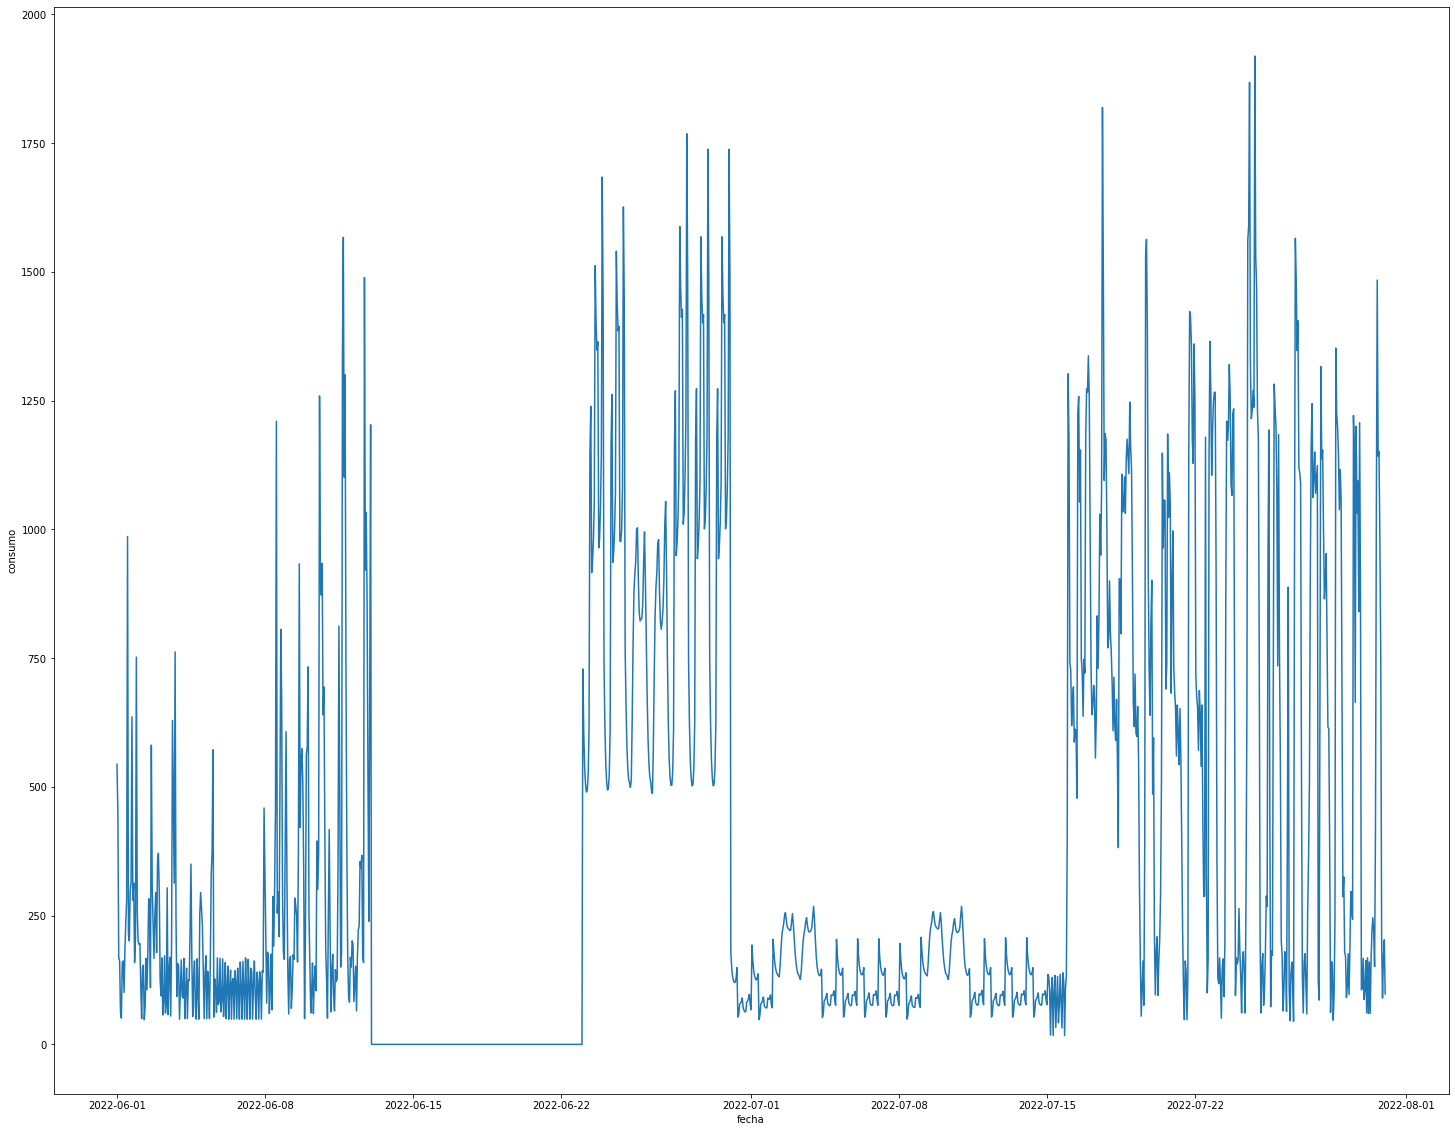

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 20]
sns.lineplot(data=cc.reset_index(),x='fecha',y='consumo')

In [8]:
cc


,factura,consumo,tipo,periodo,factura_iberdrola,PCB_PRICE,EDCGASPCB_PRICE,TEUPCB_PRICE,PCB,EDCGASPCB,...,PEAJES_Y_CARGOS_P,COMERCIALIZADORA_P,TERMINO_FIJO,TERMINO_VARIABLE,TOTAL_ELECTRICIDAD,IMPUESTO_ELECTRICO,ALQUILER_CONTADOR,IMPORTE_TOTAL,IVA,TOTAL_CON_IVA
fecha,,,,,,,,,,,,,,,,,,,,,
2022-06-01 00:00:00+02:00,2022-06-28,544.0,R,P2,3220628030327990,306.90,NaN,28.47,0.166954,NaN,...,0.017145,0.001955,0.0191,0.166954,0.186053,0.000930,0.00111,0.188093,0.009405,0.197498
2022-06-01 01:00:00+02:00,2022-06-28,451.0,R,P3,3220628030327990,270.19,NaN,3.03,0.121856,NaN,...,0.017145,0.001955,0.0191,0.121856,0.140955,0.000705,0.00111,0.142770,0.007138,0.149908
2022-06-01 02:00:00+02:00,2022-06-28,168.0,R,P3,3220628030327990,260.25,NaN,3.03,0.043722,NaN,...,0.017145,0.001955,0.0191,0.043722,0.062822,0.000314,0.00111,0.064245,0.003212,0.067458
2022-06-01 03:00:00+02:00,2022-06-28,162.0,R,P3,3220628030327990,252.30,NaN,3.03,0.040873,NaN,...,0.017145,0.001955,0.0191,0.040873,0.059972,0.000300,0.00111,0.061382,0.003069,0.064451
2022-06-01 04:00:00+02:00,2022-06-28,61.0,R,P3,3220628030327990,248.31,NaN,3.03,0.015147,NaN,...,0.017145,0.001955,0.0191,0.015147,0.034247,0.000171,0.00111,0.035527,0.001776,0.037304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-30 20:00:00+02:00,2022-09-27,205.0,R,P3,3220927030337878,283.96,101.87,3.03,0.058212,0.020883,...,0.017145,0.001955,0.0191,0.058212,0.077311,0.000387,0.00111,0.078808,0.003940,0.082748
2022-07-30 21:00:00+02:00,2022-09-27,90.0,R,P3,3220927030337878,295.52,107.16,3.03,0.026597,0.009644,...,0.017145,0.001955,0.0191,0.026597,0.045696,0.000228,0.00111,0.047035,0.002352,0.049386
2022-07-30 22:00:00+02:00,2022-09-27,169.0,R,P3,3220927030337878,302.51,112.74,3.03,0.051124,0.019053,...,0.017145,0.001955,0.0191,0.051124,0.070224,0.000351,0.00111,0.071685,0.003584,0.075269


In [9]:
cc.shape[0]/24

60.041666666666664

In [10]:
cc.groupby('periodo').sum()

<ipython-input-10-eedf7e5c06ee>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cc.groupby('periodo').sum()


,consumo,PCB_PRICE,EDCGASPCB_PRICE,TEUPCB_PRICE,PCB,EDCGASPCB,TEUPCB,PEAJES_E_PRICE,CARGOS_E_PRICE,PEAJES_E,...,PEAJES_Y_CARGOS_P,COMERCIALIZADORA_P,TERMINO_FIJO,TERMINO_VARIABLE,TOTAL_ELECTRICIDAD,IMPUESTO_ELECTRICO,ALQUILER_CONTADOR,IMPORTE_TOTAL,IVA,TOTAL_CON_IVA
periodo,,,,,,,,,,,,,,,,,,,,,
P1,128999.0,120282.70,26430.13,25597.04,43.958764,10.622863,9.598816,9.558728,16.037968,3.584495,...,5.897916,0.672370,6.570285,43.958764,50.529049,0.252645,0.381697,51.163391,2.558170,53.721560
P2,149699.0,104885.62,27817.33,9822.15,44.147212,12.738034,4.261931,6.605370,3.216780,2.866137,...,5.915061,0.674324,6.589385,44.147212,50.736597,0.253683,0.382806,51.373087,2.568654,53.941741
P3,252857.0,225106.09,78877.21,2278.56,73.094318,27.806980,0.766157,0.528656,1.752912,0.177758,...,12.893118,1.469831,14.362949,73.094318,87.457268,0.437286,0.834407,88.728961,4.436448,93.165409


In [11]:
result=domicilio.formater(cc)

/home/nacho/work/PYTHON/venv/lib/python3.8/site-packages/kwhmeter_utils/factura_pvpc.py:56: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cc_por_periodo=datos.groupby('periodo').sum()


In [12]:
import jinja2
template_loader = jinja2.FileSystemLoader('../kwhmeter_utils/templates')
template_env = jinja2.Environment(loader=template_loader)

template = template_env.get_template('factura_pvpc.html')
output_text = template.render(result)

from IPython.core.display import display, HTML
display(HTML(output_text))
with open('pvpc.html',"w") as f:
    f.write(output_text)

In [13]:
import pdfkit
#Define path to wkhtmltopdf.exe
path_to_wkhtmltopdf = r'/usr/bin/wkhtmltopdf'
#Define path to HTML file
path_to_file = 'sample.html'
#Point pdfkit configuration to wkhtmltopdf.exe
config = pdfkit.configuration(wkhtmltopdf=path_to_wkhtmltopdf)
#Convert HTML file to PDF
options = {
    'zoom':2,
}
pdfkit.from_string(output_text, output_path='sample.pdf',options=options)

True

/home/nacho/work/PYTHON/venv/lib/python3.8/site-packages/calplot/calplot.py:193: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  ax.set_xticks([by_day.loc[pd.Timestamp(


<AxesSubplot:>

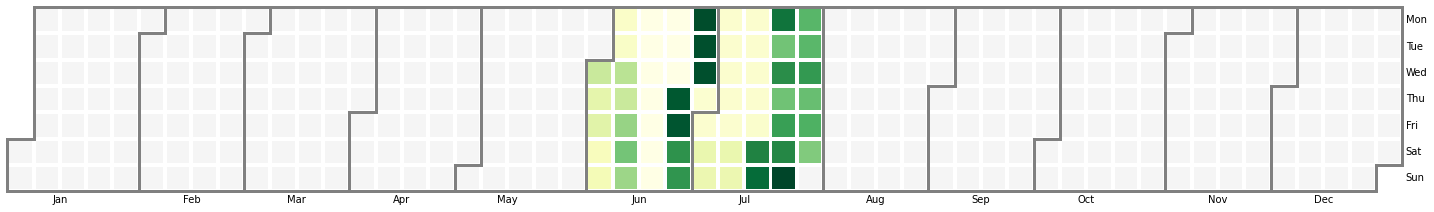

In [14]:
import calplot
cc0=cc[(cc.index.hour>=9) & (cc.index.hour<=22)]
calplot.yearplot(cc0['consumo'],linewidth=3, cmap='YlGn')

In [15]:
cc0

,factura,consumo,tipo,periodo,factura_iberdrola,PCB_PRICE,EDCGASPCB_PRICE,TEUPCB_PRICE,PCB,EDCGASPCB,...,PEAJES_Y_CARGOS_P,COMERCIALIZADORA_P,TERMINO_FIJO,TERMINO_VARIABLE,TOTAL_ELECTRICIDAD,IMPUESTO_ELECTRICO,ALQUILER_CONTADOR,IMPORTE_TOTAL,IVA,TOTAL_CON_IVA
fecha,,,,,,,,,,,,,,,,,,,,,
2022-06-01 09:00:00+02:00,2022-06-28,183.0,R,P2,3220628030327990,322.57,NaN,28.47,0.059030,NaN,...,0.017145,0.001955,0.0191,0.059030,0.078130,0.000391,0.00111,0.079630,0.003982,0.083612
2022-06-01 10:00:00+02:00,2022-06-28,238.0,R,P2,3220628030327990,299.73,NaN,28.47,0.071336,NaN,...,0.017145,0.001955,0.0191,0.071336,0.090435,0.000452,0.00111,0.091997,0.004600,0.096597
2022-06-01 11:00:00+02:00,2022-06-28,281.0,R,P1,3220628030327990,327.31,NaN,74.41,0.091974,NaN,...,0.017145,0.001955,0.0191,0.091974,0.111074,0.000555,0.00111,0.112739,0.005637,0.118376
2022-06-01 12:00:00+02:00,2022-06-28,986.0,R,P1,3220628030327990,322.75,NaN,74.41,0.318232,NaN,...,0.017145,0.001955,0.0191,0.318232,0.337331,0.001687,0.00111,0.340127,0.017006,0.357134
2022-06-01 13:00:00+02:00,2022-06-28,213.0,R,P1,3220628030327990,313.28,NaN,74.41,0.066729,NaN,...,0.017145,0.001955,0.0191,0.066729,0.085828,0.000429,0.00111,0.087367,0.004368,0.091735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-30 18:00:00+02:00,2022-09-27,977.0,R,P3,3220927030337878,244.24,94.46,3.03,0.238622,0.092287,...,0.017145,0.001955,0.0191,0.238622,0.257722,0.001289,0.00111,0.260120,0.013006,0.273126
2022-07-30 19:00:00+02:00,2022-09-27,749.0,R,P3,3220927030337878,250.50,96.31,3.03,0.187624,0.072136,...,0.017145,0.001955,0.0191,0.187624,0.206724,0.001034,0.00111,0.208867,0.010443,0.219311
2022-07-30 20:00:00+02:00,2022-09-27,205.0,R,P3,3220927030337878,283.96,101.87,3.03,0.058212,0.020883,...,0.017145,0.001955,0.0191,0.058212,0.077311,0.000387,0.00111,0.078808,0.003940,0.082748


/home/nacho/work/PYTHON/venv/lib/python3.8/site-packages/calplot/calplot.py:193: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  ax.set_xticks([by_day.loc[pd.Timestamp(


<AxesSubplot:>

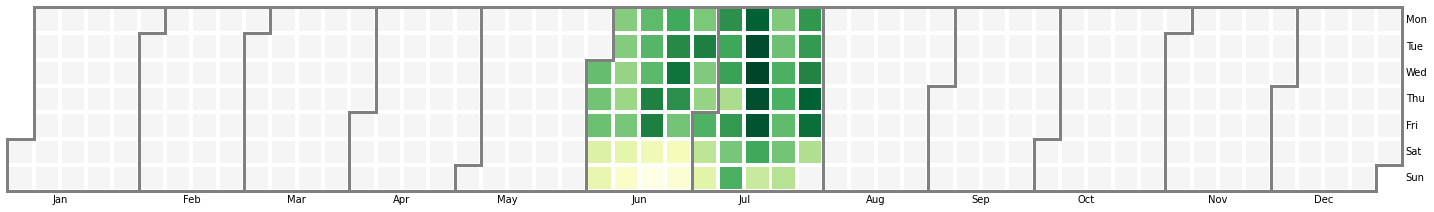

In [16]:
import calplot
calplot.yearplot(cc0['PCB_PRICE'],linewidth=3, cmap='YlGn')